## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">STATISTICS</p>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
tips = sns.load_dataset("tips")

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


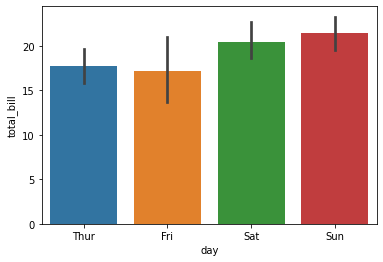

In [61]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=('ci', 95));

In [62]:
xbar = tips[tips["day"] == "Fri"]["total_bill"].mean()
xbar

17.151578947368417

In [63]:
s = tips[tips["day"] == "Fri"]["total_bill"].std()
s

8.302659723217143

In [64]:
n = tips[tips["day"] == "Fri"]["total_bill"].count()
n

19

In [65]:
s / np.sqrt(n)  # standard error of the mean

1.904760773479416

In [66]:
sem = tips[tips["day"] == "Fri"]["total_bill"].sem()
sem

1.904760773479416

Calculate tne magrin of the error

In [67]:
# for 95% confidence level
moe = 1.96 * sem
moe

3.7333311160196554

How to calculate z critical value

In [68]:
z = stats.norm.ppf(1-0.025)
z

1.959963984540054

In [69]:
# for 95% confidence level
moe = z * sem
moe

3.7332625151843115

Calculate lower confidence limit

In [70]:
lower_lim = xbar - moe
lower_lim

13.418316432184106

Calculate upper confidence limit

In [71]:
upper_lim = xbar + moe
upper_lim

20.88484146255273

In [72]:
stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

Confidence interval using t distribution

In [73]:
stats.t.interval(alpha=0.95, df=n-1, loc=xbar, scale=sem)  #CORRECT
# en doğru olan bu çünkü populasyon std sini bilmiyorum
# gerçek güven aralığı bu.
# buradaki df bildiğimiz df değil.
#T aralık olarak daha geniş.
#T daha pratik daha iyi sen T kullan.

(13.149825056979093, 21.15333283775774)

for saturday

In [74]:
stats.t.interval(alpha=0.95,                                              #CONFİDENCE LEVEL
                 df=tips[tips["day"] == "Sat"]["total_bill"].count()-1,   #DEGREES OF FREEDOM (N-1)
                 loc=tips[tips["day"] == "Sat"]["total_bill"].mean(),     #MEAN
                 scale=tips[tips["day"] == "Sat"]["total_bill"].sem())    #STANDARD ERROR OF THE MEAN

(18.420827942450163, 22.461930678239487)

In [75]:
stats.t.interval(alpha=0.99,                                              #CONFİDENCE LEVEL
                 df=tips[tips["day"] == "Sat"]["total_bill"].count()-1,   #DEGREES OF FREEDOM (N-1)
                 loc=tips[tips["day"] == "Sat"]["total_bill"].mean(),     #MEAN
                 scale=tips[tips["day"] == "Sat"]["total_bill"].sem())    #STANDARD ERROR OF THE MEAN

(17.76394599025322, 23.11881263043643)